# Data Science Task

# 1. import dataset

In [40]:
import pandas as pd
import numpy as np
import math

data = pd.read_csv('drinkMenu.csv')
print(data.shape)

(242, 18)


# 2. Data Preparation

## - Remove duplicates

In [41]:
data = data.drop_duplicates()
print(data.shape)

(242, 18)


##### there is no duplicates in these dataset as shown the shape didn't chage.

## - Fill null values

I will show you the distict values in each column to specify whether columns have nan values

In [42]:
for i in range(data.shape[1]):
    col = data.values[:,i]
    print(data.keys()[i])
    print(pd.unique(col))
    print()

Beverage_category
['Coffee' 'Classic Espresso Drinks' 'Signature Espresso Drinks'
 'Tazo® Tea Drinks' 'Shaken Iced Beverages' 'Smoothies'
 'Frappuccino® Blended Coffee' 'Frappuccino® Light Blended Coffee'
 'Frappuccino® Blended Crème']

Beverage
['Brewed Coffee' 'Caffè Latte' 'Caffè Mocha (Without Whipped Cream)'
 'Vanilla Latte (Or Other Flavoured Latte)' 'Caffè Americano' 'Cappuccino'
 'Espresso' 'Skinny Latte (Any Flavour)' 'Caramel Macchiato'
 'White Chocolate Mocha (Without Whipped Cream)'
 'Hot Chocolate (Without Whipped Cream)'
 'Caramel Apple Spice (Without Whipped Cream)' 'Tazo® Tea'
 'Tazo® Chai Tea Latte' 'Tazo® Green Tea Latte'
 'Tazo® Full-Leaf Tea Latte'
 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)'
 'Iced Brewed Coffee (With Classic Syrup)'
 'Iced Brewed Coffee (With Milk & Classic Syrup)'
 'Shaken Iced Tazo® Tea (With Classic Syrup)'
 'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)'
 'Banana Chocolate Smoothie' 'Orange Mango Banana Smoothie'
 'Strawberry Banan

### As shown, only "Caffaeine (mg)" column that has single nan value, so i will replace it with the mean of the remaining values in the same columns.

###### 1- apply mask1 to exclude 'Varies' indices from the column.
###### 2- apply mask2 to exclude 'varies' indices from the column.
###### 3- apply mask3 to exclude nan indices from the column.
###### 4- concatenate them into big mask include the indices of all values.
###### 5- use np.int32() casting to convert each value from str to int, then get the mean of them.

In [43]:
mask1 = data.values[:,17] == 'Varies'
mask1 = mask1.nonzero()[0]
mask2 = data.values[:,17] == 'varies'
mask2 = mask2.nonzero()[0]
mask3 = pd.isna(data.values[:,17])
mask3 = mask3.nonzero()[0]
mask = np.concatenate((mask1, mask2))
mask = np.concatenate((mask, mask3))
mask = [i for i in range(data.values[:,17].shape[0]) if i not in mask]
mask = np.array(mask)
avg = np.int32(data.values[mask,17]).mean()
print(avg)

89.52054794520548


### fill nan value with the ceil of the average 

In [44]:
data = data.fillna(str(math.ceil(avg)))
print(data.values[158,17])

90


## - Drop unnecessary Columns

In [45]:
print(data.keys())

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


in this problem i suggest that the most important columns (i mean DrinkMenu) are ["Beverage_category", "Beverage", "Beverage_prep", "Calories", "Total Fat (g)", "Total Carbohydrates (g)", "Sugars (g)", "Protein (g)", "Caffeine (mg)"], so i will drop the remaining ones.

In [46]:
k =data.keys()
data = data.drop([k[5],k[6],k[7],k[9],k[10],k[13],k[14],k[15],k[16]],axis=1)
print(data)

              Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Ca

# 3- Data Visualisations

## Which drink has the highest calories from the dataset?

Highest Calorie Drink:    Signature Espresso Drinks White Chocolate Mocha (Without Whipped Cream) 2% Milk


<AxesSubplot:>

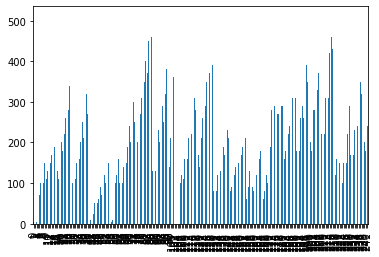

In [47]:
pt = data[data.keys()[3]]
max_idx_Cal = np.argmax(pt)
print("Highest Calorie Drink:   ", data.values[max_idx_Cal, 0], data.values[max_idx_Cal, 1], data.values[max_idx_Cal, 2])
pt.plot(kind='bar')

## Highest Sugar Drink?

214
Highest Suger Drink:    Frappuccino® Blended Coffee Java Chip (Without Whipped Cream) Venti Nonfat Milk


<AxesSubplot:>

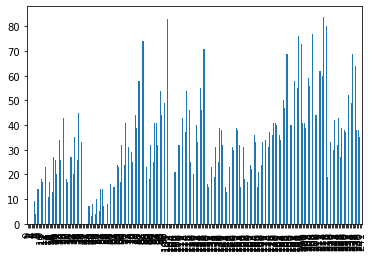

In [48]:
pt = data[data.keys()[6]]
max_idx_Sug = np.argmax(pt)
print(max_idx_Sug)
print("Highest Suger Drink:   ", data.values[max_idx_Sug, 0], data.values[max_idx_Sug, 1], data.values[max_idx_Sug, 2])
pt.plot(kind='bar')